In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn import metrics

RANDOM_SEED = 13122001

In [2]:
X_train= pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
y_train=pd.read_csv('y_train.csv')
df=pd.read_csv('df.csv')
df


,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,SleepTime,Asthma,KidneyDisease,SkinCancer,isWhite,isBlack,isAsian,isAmerican,isHispanic,isOther
0,0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,1.0,...,0.173913,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,...,0.260870,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.0,...,0.304348,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,...,0.217391,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,1.0,...,0.304348,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,0.0,...,0.217391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.173913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319792,319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,...,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319793,319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,...,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
X_train=X_train.drop(['Unnamed: 0'],axis=1)
X_test=X_test.drop(['Unnamed: 0'],axis=1)
y_train=y_train.drop(['Unnamed: 0'],axis=1)
y_test=y_test.drop(['Unnamed: 0'],axis=1)
df=df.drop(['Unnamed: 0'],axis=1)
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']

# DecisionTreeClassifier

In [ ]:
#Create an instance of a Decision Tree classifier 
clf= DecisionTreeClassifier(random_state=13)
#Training,i.e,fitting the model(using the training data)
clf.fit(X_train,y_train)
predictions= clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

# RandomForest

In [4]:

param_grid = {'n_estimators':[200,100],'max_depth':[50,100]}
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)

model= RandomForestClassifier(random_state=13122001,n_estimators=200,max_depth=100)
grid = GridSearchCV(model
                    ,cv=kf
                    ,param_grid=param_grid
                    ,refit=True
                    ,verbose=3
                    ,scoring = 'accuracy')
grid.fit(X_train,np.ravel(y_train))

prediction =grid.best_estimator_.predict(X_test)
print(classification_report(y_test,prediction))
print('Accuracy',metrics.accuracy_score(y_test,prediction))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [17]:
confusion_matrix(y_test,prediction)

array([[82362,  5461],
       [ 5947,  2169]], dtype=int64)

In [ ]:
accuracy_score(y_test,prediction)

c:\Users\Utilizador\anaconda3\envs\env3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


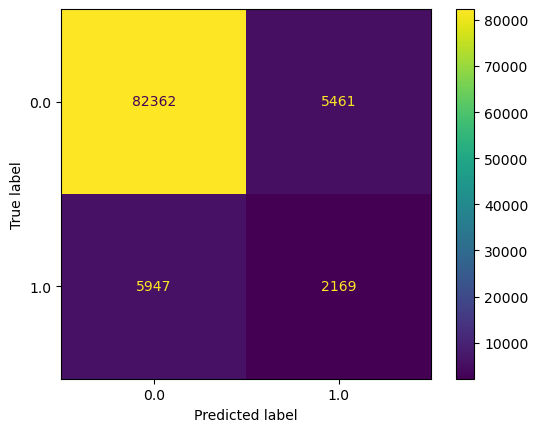

In [18]:
plot_confusion_matrix(grid.best_estimator_,X_test,y_test)